In [45]:
#import the pakcages that we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'intercept':[1] * numrows,
                             'today':[0.0] * numrows,
                             'yesterday':[0.0] * numrows,
                             'tomorrow':[0.0] * numrows})

#sort columns for convience
seq = ['intercept',
       'today',
       'yesterday',
       'tomorrow']
regression_df = regression_df.reindex(columns=seq)

In [46]:
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    yesterday = df.iloc[(i-2),1]
    regression_df.iat[i,3] = tomorrow
    regression_df.iat[i,2] = today
    regression_df.iat[i,1] = yesterday


regression_df = regression_df.dropna() #exclude any rows with missing data

In [47]:
#this makes a simple dataframe with a relationship that we can now plot
regression_df.describe

<bound method NDFrame.describe of        intercept  today  yesterday  tomorrow
0              1   0.00       0.00      0.47
1              1   0.00       0.47      0.59
2              1   0.47       0.59      0.42
3              1   0.59       0.42      0.31
4              1   0.42       0.31      0.17
...          ...    ...        ...       ...
25544          1   0.00       0.00      0.00
25545          1   0.00       0.00      0.00
25546          1   0.00       0.00      0.00
25547          1   0.00       0.00      0.00
25548          1   0.00       0.00      0.00

[25542 rows x 4 columns]>

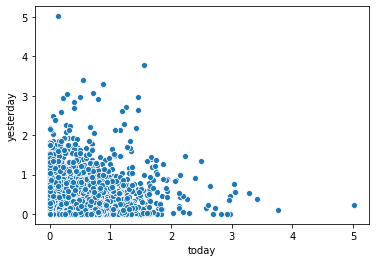

In [48]:
sns.scatterplot(x='today',y='yesterday',data=regression_df)

In [49]:
def gradientDescent(X, y, param, alpha, num_iters):
    """
       Performs gradient descent to learn param
    """
    for i in range(num_iters):
        y_hat = np.dot(X, param) # notice we use numpy here to efficently calculate the values
        param = param - alpha * np.dot(X.T, y_hat-y)
    return param

In [50]:

X = regression_df.iloc[0:200:,0:2]
y = regression_df.iloc[0:200:,2]
param = np.array([1,1])
alpha = 0.0001
num_iters = 1000

solution = gradientDescent(X, y, param, alpha, num_iters)
solution

array([0.08086788, 0.34022513])

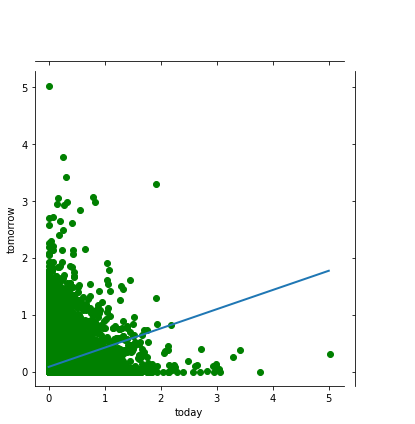

In [51]:
grid = sns.JointGrid(x=regression_df.today,y=regression_df.tomorrow)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 5], [0.0811, 1.77], linewidth=2)

In [52]:
from sklearn import linear_model
#modify the data to work with this library
x = regression_df.today.values
y = regression_df.yesterday.values
x = x.reshape(regression_df.shape[0], 1)
y = y.reshape(regression_df.shape[0], 1)

In [53]:
mymodel = linear_model.LinearRegression().fit(x,y)


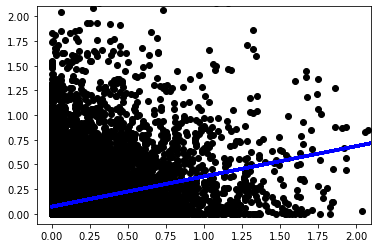

In [54]:
plt.scatter(x, y,  color='black')
plt.plot(x, mymodel.predict(x), color='blue', linewidth=3)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [55]:
# using the r2 (pronounced r squared) value we can get a basic measure of model quality
from sklearn.metrics import r2_score
r2_score(y,mymodel.predict(x))

0.09367270942443584

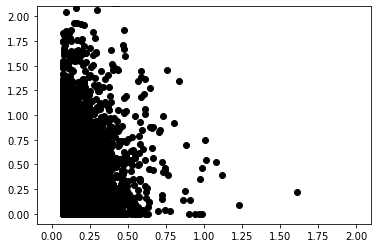

In [56]:
plt.scatter(mymodel.predict(x), y,  color='black')
plt.xlim(-0.1,2.1) #to keep the same scale as the previous plot
plt.ylim(-0.1,2.1) # same reason as xlim
plt.show()